In [1]:
import json
import random
import pymongo
import datetime
import pandas as pd
from pprint import pprint
from random import shuffle
from tqdm import tqdm, tqdm_notebook

In [40]:
myClient = pymongo.MongoClient("mongodb://localhost:27017")
myDatabase = myClient.iStorage
myCollection = myDatabase.iData

In [3]:
categories = ['news', 'bisnis', 'sports', 'entertainment', 'tekno', 'otomotif', 'health']

In [4]:
polhukam,bisnis,olahraga,hiburan,teknologi,otomotif,kesehatan = [],[],[],[],[],[],[]

In [5]:
for category in tqdm_notebook(categories):
    temp = []
    iQuery = myCollection.find({
        'category' : category
    })
    if category == 'news':
        for q in iQuery: temp.append(q)
        shuffle(temp)
        for t in temp[:1000]: polhukam.append(t)
    elif category == 'bisnis':
        for q in iQuery: temp.append(q)
        shuffle(temp)
        for t in temp[:1000]: bisnis.append(t)
    elif category == 'sports':
        for q in iQuery: temp.append(q)
        shuffle(temp)
        for t in temp[:1000]: olahraga.append(t)
    elif category == 'entertainment':
        for q in iQuery: temp.append(q)
        shuffle(temp)
        for t in temp[:1000]: hiburan.append(t)
    elif category == 'tekno':
        for q in iQuery: temp.append(q)
        shuffle(temp)
        for t in temp[:1000]: teknologi.append(t)
    elif category == 'otomotif':
        for q in iQuery: temp.append(q)
        shuffle(temp)
        for t in temp[:1000]: otomotif.append(t)
    elif category == 'health':
        for q in iQuery: temp.append(q)
        shuffle(temp)
        for t in temp[:1000]: kesehatan.append(t)

In [36]:
for i in range(1):
    print('Polhukam  : {}'.format(len(polhukam)))
    print('Bisnis    : {}'.format(len(bisnis)))
    print('Hiburan   : {}'.format(len(hiburan)))
    print('Olahraga  : {}'.format(len(olahraga)))
    print('Teknologi : {}'.format(len(teknologi)))
    print('Otomotif  : {}'.format(len(otomotif)))
    print('Kesehatan : {}'.format(len(kesehatan)))

Polhukam  : 1000
Bisnis    : 1000
Hiburan   : 1000
Olahraga  : 1000
Teknologi : 1000
Otomotif  : 1000
Kesehatan : 1000


In [7]:
total = len(polhukam)+len(bisnis)+len(olahraga)+len(hiburan)+len(teknologi)+len(otomotif)+len(kesehatan)
print(total)

7000


In [8]:
iData = []

In [9]:
for p in tqdm(polhukam[:20000]): iData.append(p)
for b in tqdm(bisnis[:20000]): iData.append(b)
for o in tqdm(olahraga[:20000]): iData.append(o)
for h in tqdm(hiburan): iData.append(h)
for t in tqdm(teknologi): iData.append(t)
for ot in tqdm(otomotif): iData.append(ot)
for k in tqdm(kesehatan): iData.append(k)

100%|██████████| 1000/1000 [00:00<00:00, 914389.36it/s]


In [44]:
df = pd.DataFrame(iData)

In [11]:
df.head()

,_id,category,title,description,url,content,contentHTML,img,subCategory,publishedAt,source,cleanContent,nerContent,countNer
0,5da8c331d0f219869a77dc10,news,"Gempa Magnitudo 5,3 Guncang Sitaro, Sulawesi U...","Gempa Magnitudo 5,3 Guncang Sitaro, Sulawesi U...",https://regional.kompas.com/read/2019/08/06/11...,"Gempa bumi magnitudo 5,3 guncang Kabupaten Kep...","[Gempa bumi magnitudo 5,3 guncang Kabupaten Ke...",https://asset.kompas.com/crops/5YiycgM2SU9rw8r...,Regional,06-08-2019,kompas.com,gempa bumi magnitudo 5 3 guncang kabupaten kep...,"[<div class=""entities""> Gempa bumi magnitudo 5...","{'person': 1, 'org': 2, 'gpe': 4, 'event': 0, ..."
1,5da975ec5e81c329d6c822d7,news,Wiranto Sebut Tersangka Kerusuhan di Papua dan...,Wiranto Sebut Tersangka Kerusuhan di Papua dan...,https://nasional.kompas.com/read/2019/09/02/17...,"Menteri Koordinator Bidang Politik, Hukum, dan...","[Menteri Koordinator Bidang Politik, Hukum, da...",https://asset.kompas.com/crops/oIgrCbwE7pOzzKK...,Nasional,02-09-2019,kompas.com,menteri koordinator bidang politik hukum keama...,"[<div class=""entities""> Menteri Koordinator Bi...","{'person': 9, 'org': 9, 'gpe': 19, 'event': 0,..."
2,5da95a38b344bce138c1c0f6,news,"Tingkat Kepuasan Publik Anjlok, PM Mahathir Ak...","Tingkat Kepuasan Publik Anjlok, PM Mahathir Ak...",https://internasional.kompas.com/read/2019/08/...,Perdana Menteri Malaysia Mahathir Mohamad dika...,[Perdana Menteri Malaysia Mahathir Mohamad d...,https://asset.kompas.com/crops/Tv0b7Jm-yAZfVOa...,Internasional,22-08-2019,kompas.com,perdana menteri malaysia mahathir mohamad dika...,"[<div class=""entities""> Perdana Menteri <mark ...","{'person': 8, 'org': 2, 'gpe': 1, 'event': 0, ..."
3,5d70a1b507a3d256dcc73fd4,news,Taksi Konvensional di London Gugat Uber Rp 19 ...,Taksi Konvensional di London Gugat Uber Rp 19 ...,https://dunia.tempo.co/read/1110210/taksi-konv...,"Para pengemudi taksi di London, Inggris, akan ...","[Para pengemudi taksi di London, Inggris, akan...",https://statik.tempo.co/data/2018/07/24/id_721...,Oops,25-07-2018,tempo.co,pengemudi taksi london inggris menuntut uber u...,"[<div class=""entities""> Para pengemudi taksi d...","{'person': 4, 'org': 10, 'gpe': 6, 'event': 0,..."
4,5da70cab054b220d9862e8c6,news,[POPULER MEGAPOLITAN] 652 Orang Ditilang karen...,[POPULER MEGAPOLITAN] 652 Orang Ditilang karen...,https://megapolitan.kompas.com/read/2019/04/02...,Pada Senin (1/4/2019) ada sejumlah pemberitaan...,[Pada Senin (1/4/2019) ada sejumlah pemberitaa...,https://asset.kompas.com/crops/ZCq7vxt8aEJMwGw...,Megapolitan,02-04-2019,kompas.com,senin 1 4 2019 pemberitaan menarik perhatian p...,"[<div class=""entities""> Pada Senin (1/4/2019) ...","{'person': 5, 'org': 5, 'gpe': 0, 'event': 0, ..."


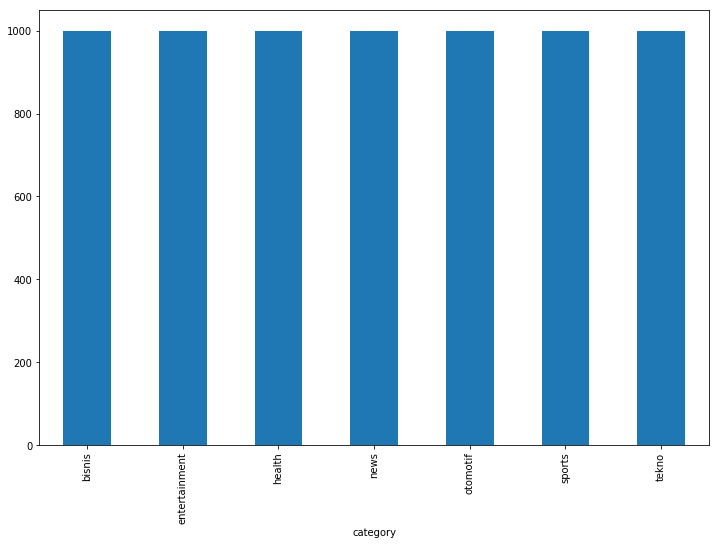

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
df.groupby('category').title.count().plot.bar(ylim=0)
plt.show()

In [37]:
import textacy
from textacy.preprocess import preprocess_text
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
vectorizer = TfidfVectorizer(min_df=1, max_df=0.5)

In [31]:
vz = vectorizer.fit_transform(df.title)

In [20]:
vz.shape

(7000, 12479)

In [21]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=0)
svd_tfidf = svd.fit_transform(vz)

svd_tfidf.shape

(7000, 50)

In [21]:
from MulticoreTSNE import MulticoreTSNE as TSNEM
import time

start = time.time()

tsnem_model = TSNEM(n_components=2, verbose=3, perplexity=150.0, random_state=0, n_iter=500, n_jobs=8)
tsnem_tfidf = tsnem_model.fit_transform(svd_tfidf)

done = int(time.time() - start)
print("\nTime exec = %s\n" % str(pd.to_datetime(done, unit='s')).split(' ')[1])

print(tsnem_tfidf.shape)


Time exec = 00:13:24

(133670, 2)


In [22]:
from sklearn.cluster import DBSCAN

In [23]:
clustering = DBSCAN(eps=3, min_samples=2).fit(svd_tfidf)

In [24]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
clustering

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)